In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the dataset
globTemp = pd.read_csv('GlobalTemperatures.csv')

# Handling missing data
globTemp.dropna(inplace=True)

# Convert dates to datetime and set as index
globTemp["dt"] = pd.to_datetime(globTemp["dt"])
globTemp.set_index("dt", inplace=True)

# Display dataset information
print("Dataset Shape:", globTemp.shape)
print(globTemp.info())

Dataset Shape: (1992, 8)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1992 entries, 1850-01-01 to 2015-12-01
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LandAverageTemperature                     1992 non-null   float64
 1   LandAverageTemperatureUncertainty          1992 non-null   float64
 2   LandMaxTemperature                         1992 non-null   float64
 3   LandMaxTemperatureUncertainty              1992 non-null   float64
 4   LandMinTemperature                         1992 non-null   float64
 5   LandMinTemperatureUncertainty              1992 non-null   float64
 6   LandAndOceanAverageTemperature             1992 non-null   float64
 7   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8)
memory usage: 140.1 KB
None


In [4]:
# Add year, month, and season columns
globTemp['year'] = globTemp.index.year
globTemp['month'] = globTemp.index.month
globTemp['season'] = (globTemp['month'] % 12 + 3) // 3

# Map seasons to labels
season_map = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"}
globTemp['season'] = globTemp['season'].map(season_map)

In [5]:
# Encode the 'season' column
le = LabelEncoder()
globTemp['season_encoded'] = le.fit_transform(globTemp['season'])

# Features (X) and target variable (y)
X = globTemp[['year', 'month', 'season_encoded']]
y = globTemp['LandAverageTemperature']

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
# Make predictions
rf_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest - Mean Squared Error:", rf_mse)
print("Random Forest - R2 Score:", rf_r2)

Random Forest - Mean Squared Error: 0.1704203991666665
Random Forest - R2 Score: 0.9907108515355977


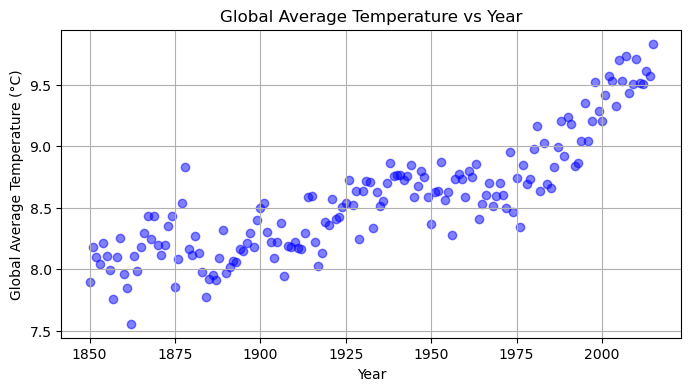

In [8]:
# Create a new variable 'global_temp' from the cleaned dataset
global_temp = globTemp.copy()

# Extract 'year' from the datetime index for later grouping
global_temp["year"] = global_temp.index.year

# Step 2: Group by 'year' and calculate the average temperature for each year
global_temp_yearly = global_temp.groupby("year")["LandAverageTemperature"].mean()

# Step 3: Create the scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(global_temp_yearly.index, global_temp_yearly.values, color='blue', alpha=0.5)
plt.title("Global Average Temperature vs Year")
plt.xlabel("Year")
plt.ylabel("Global Average Temperature (°C)")
plt.grid(True)
plt.show()

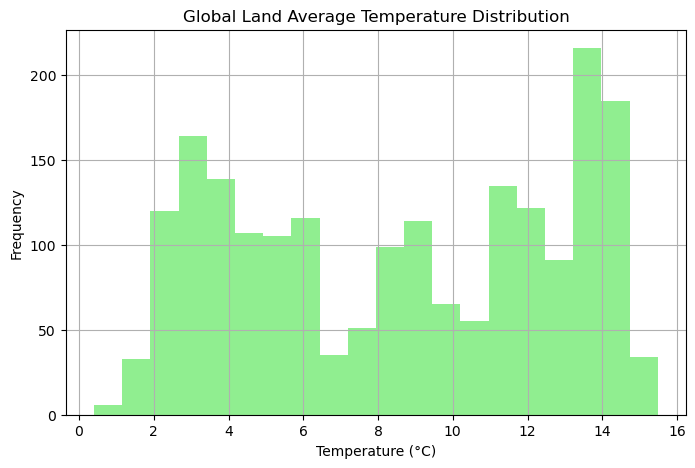

In [9]:
plt.figure(figsize=(8, 5))
globTemp['LandAverageTemperature'].plot(kind='hist', bins=20, color="lightgreen")
plt.title("Global Land Average Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

C:\Users\Manali N\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Manali N\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


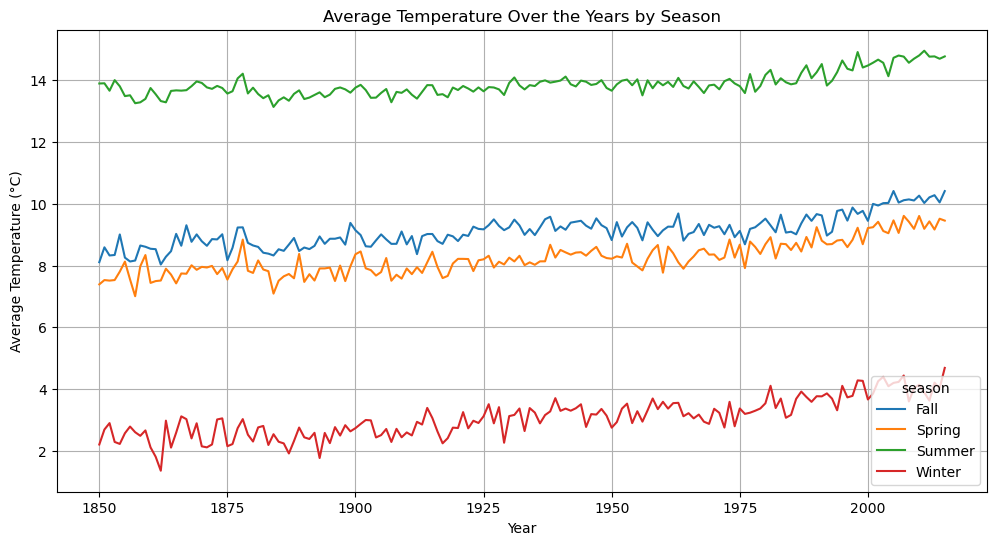

In [10]:
# Group by year and season
global_temp_season = globTemp.groupby(["year", "season"]).mean().reset_index()

# Line plot by season
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_temp_season, x="year", y="LandAverageTemperature", hue="season")
plt.title("Average Temperature Over the Years by Season")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.grid(True)
plt.show()

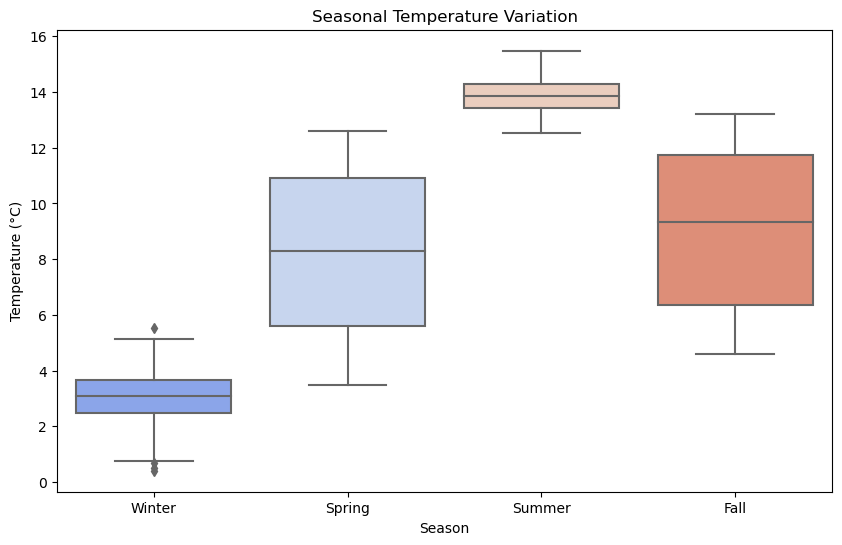

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=globTemp, x="season", y="LandAverageTemperature", palette="coolwarm")
plt.title("Seasonal Temperature Variation")
plt.xlabel("Season")
plt.ylabel("Temperature (°C)")
plt.show()